In [1]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams["font.family"] = "sans-serif"
import PIL.Image as Image # this imports *only* the Image function from the PIL module
import pandas as pd


1.Relationship between the year acquired and the year constructed

2.Total square footage as a function of congressional district

3.Average square footage per floor as a function of congressional district

In [2]:
buildings=pd.read_csv("/Users/zoe/Documents/590/building_inventory.csv")

In [3]:
buildings

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
5,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
6,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,In Use,2000,2000,120,1,1,0,Unusual,Unusual,Not provided
7,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,In Use,2000,2000,120,1,1,0,Unusual,Unusual,Not provided
8,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,2000,2000,144,1,1,0,Unusual,Unusual,Not provided
9,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,2000,2000,144,1,1,0,Unusual,Unusual,Not provided



1.Relationship between the year acquired and the year constructed

From the plot, we can know that the longer the house is constructed, the longer the house is acquired. 


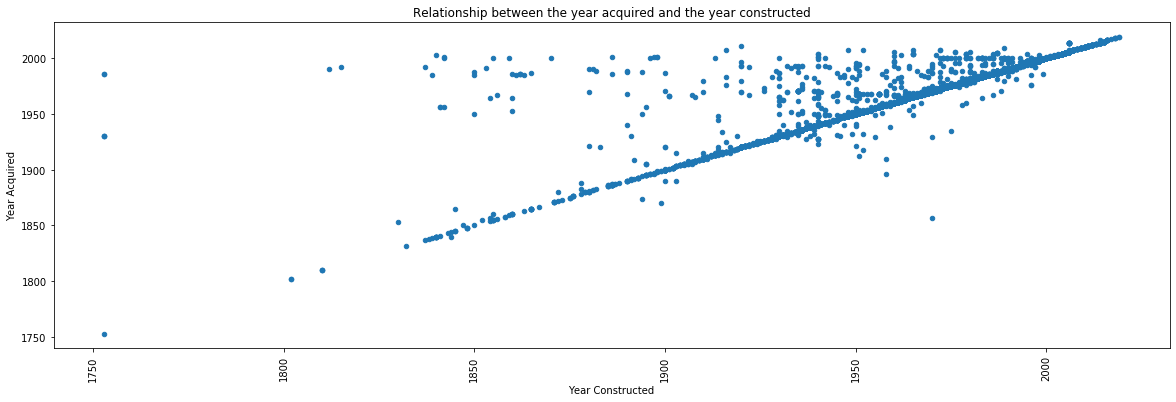

In [19]:
newdata=buildings[(buildings['Year Constructed']!=0)&(buildings['Year Acquired']!=0)]

newdata.plot.scatter(x ="Year Constructed", y="Year Acquired",title="Relationship between the year acquired and the year constructed",figsize=(20,6), rot=90)


2.Total square footage as a function of congressional district
From the plot, congressional district 13 has the most total square footage.Then is 12 and 7.

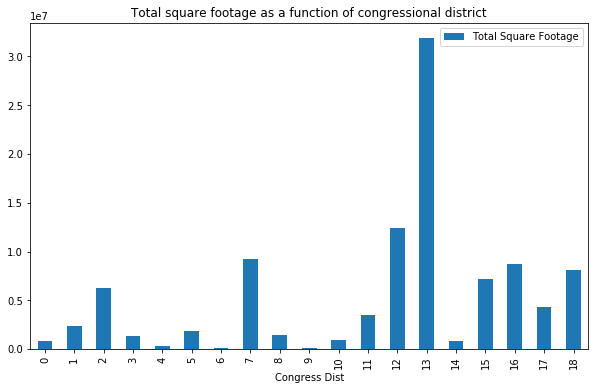

In [9]:
newdata2=buildings.groupby('Congress Dist')["Square Footage"].sum().reset_index(name="Total Square Footage")
newdata2
newdata2["Congress Dist"]=newdata2["Congress Dist"].astype('category')
newdata2.plot.bar(x = "Congress Dist", y="Total Square Footage", title="Total square footage as a function of congressional district",figsize=(10,6))


3.Average square footage per floor as a function of congressional district

From the plot, difference between average square footage per floor of congressional districts is relatively small. Congress Dist 3 has the most average square footage per floor.

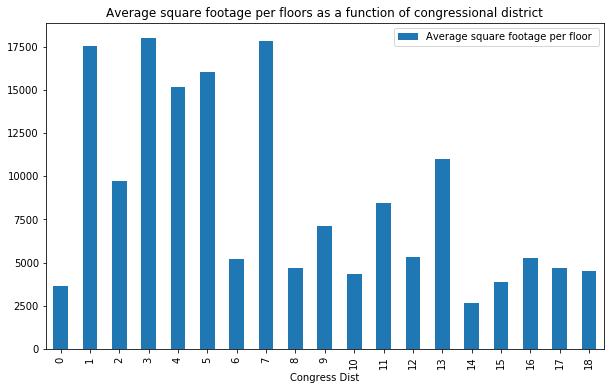

In [18]:
newdata4=buildings.groupby('Congress Dist')["Total Floors"].sum().reset_index(name="Total Floors")
Total_Square_Footage=newdata2["Total Square Footage"]
newdata4.loc[:,"Total_Square_Footage"]=Total_Square_Footage
newdata4.loc[:,"Average square footage per floor "]=newdata4["Total_Square_Footage"]/newdata4["Total Floors"]
newdata4
newdata4.plot.bar(x = "Congress Dist", y="Average square footage per floor ", title="Average square footage per floors as a function of congressional district",figsize=(10,6))



Write up conclusion:

I think it is easy to conduct the plot part by using pandas.

1.In the first question, the scatter plot successfully shows the relationship between the year acquired and the year constructed. The relationship is nearly positive correlation according to the plot.However, I am not sure about the outliers. The data cleaning part is not enough.
Scatter plot cannot give me the exact extent of correlation.It also can not show us the relationship for more than two variables.

2.In the second question,I first group the original data by Congress Dist and sum the total footage of each Congress Dist. I think bar chart can show the relationship because Congress Dist is a category variable.

However, if there are too many congress districts, bar chart is diffcult for people to tell the difference among y especially when data is similar. 


3.In the third question, I first group the original data by Congress Dist and sum the floors of each Congress Dist. Then I use total footage group by Congress Dist to divide the floors of each Congress Dist to get the average square footage per floor. I also use bar chart to show the relationship. 

However, if there are too many congress districts, bar chart is diffcult for people to tell the difference among y especially when data is similar. Sometimes, too many bars in a bar chart looks very cluttered.


